In [16]:
from sklearn import datasets

In [17]:
import tensorflow as tf

In [18]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else 0 for y in iris.target])

In [19]:
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]

not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 0]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 0]

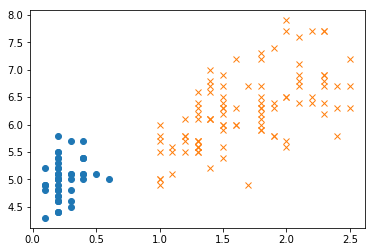

In [20]:
plt.plot(setosa_x, setosa_y, 'o', label='setasa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='not setasa')

In [21]:
tf.reset_default_graph()

In [22]:
num_epoch = 10
learning_rate = 0.01
batch_size = 10
logs_path = 'log/iris/1'

In [23]:
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[None, 2], name="x_input")
    y_ = tf.placeholder(tf.float32, shape=[None, 1], name="y_input")

In [24]:
with tf.name_scope('layer'):
    W = tf.Variable(tf.random_normal(shape=[2, 1]), name='weights')
    b = tf.Variable(tf.random_normal(shape=[1]), name='bias')
    y = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [25]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [26]:
with tf.name_scope('train'):
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [27]:
with tf.name_scope('evaluation'):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
tf.summary.scalar('cost', loss)
tf.summary.scalar('accuracy', accuracy)

summary_op = tf.summary.merge_all()

In [29]:
print(y_vals[0])

1


Epoch:  0
Epoch:  5
Epoch:  10
Epoch:  15
Epoch:  20
Epoch:  25
Epoch:  30
Epoch:  35
Epoch:  40
Epoch:  45
Epoch:  50
Epoch:  55
Epoch:  60
Epoch:  65
Epoch:  70
Epoch:  75
Epoch:  80
Epoch:  85
Epoch:  90
Epoch:  95
done


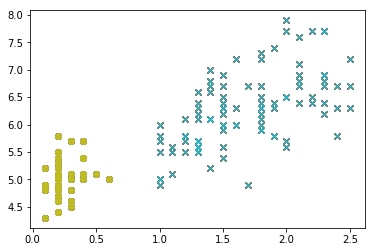

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    for epoch in range(num_epoch * 10):
        batch_count = int(len(x_vals) / batch_size)
        for i in range(batch_count):
            batch_x, batch_y = np.reshape(x_vals[i], (-1, 2)), np.reshape([y_vals[i]], (-1,1))
            #print(batch_x, batch_y)
            _, summary = sess.run([train_op, summary_op], feed_dict={x : batch_x, y_ : batch_y})
            writer.add_summary(summary, epoch * batch_count + i)
        
        if epoch % 5 == 0: 
            print("Epoch: ", epoch)
            plt.plot(setosa_x, setosa_y, 'o', label='setasa')
            plt.plot(not_setosa_x, not_setosa_y, 'x', label='not setasa')
            slope = (W.eval(session=sess)[1] / W.eval(session=sess)[0])[0]
            bias = (b.eval(session=sess) / W.eval(session=sess)[0])[0]

    print("done")
    